<a href="https://colab.research.google.com/github/ErikMayerPSU/AuroraNSL_2024/blob/main/Code/viewlines/viewline_test_2025_1302_1500.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

View Lines

Based on binary_classification_2024_0627_a0935, https://github.com/ErikMayerPSU/AuroraNSL_2024/blob/main/Code/binary_classification_development/binary_classification_2024_0627_a0935.ipynb

Updates:
2/13/2025

*   Switched visibility threshold  calculation to method 2, see: https://colab.research.google.com/drive/1cu7tK7qvEiXJkVui9OLyFi-gpI4__IEH#scrollTo=Y1RQThwg5nop
*   Reversed plot order of visibility threshold

*   Fixed the method of find EB and VL to matche method 2 of finding the VT
*   Added temporary if statement to attempt to remove outliars in the VL





In [60]:
import logging; logging.basicConfig(level=logging.INFO)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

import pandas as pd

import numpy as np

plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 1

Read data from St Patrick's Day Eflux (OP-13 output) file on GitHub (see File_reading_2024_0623_a0607.ipynb)

In [61]:
# OP-13 data

df_eflux = pd.read_csv(r"https://raw.githubusercontent.com/ErikMayerPSU/AuroraNSL_2024/main/data/St%20patrick's%20day%202015/Eflux/20150318_0200UT_Eflux_e%2Call.txt", header=None, skiprows=1, nrows=7680, sep='\s+', on_bad_lines='skip')

# Define new headers
eflux_headers = ["MLT", "ML", "[mW m^-2]"]

# Set the column headers
df_eflux.columns = eflux_headers

#add column for visibility threshold (VT) T/F
df_eflux["VT"]= 0

#Set VT to 1 or 0 based on aurora visibility threshold of 1 mW m^-2
df_eflux.loc[df_eflux["[mW m^-2]"]>=1, "VT"] = 1

df_eflux

,MLT,ML,[mW m^-2],VT
0,0.00,50.0,0.009205,0
1,0.00,50.5,0.009303,0
2,0.00,51.0,0.005775,0
3,0.00,51.5,0.020590,0
4,0.00,52.0,0.000387,0
...,...,...,...,...
7675,23.75,87.5,0.023140,0
7676,23.75,88.0,0.022190,0
7677,23.75,88.5,0.023080,0
7678,23.75,89.0,0.016270,0



## **Add viewline column**

In [62]:
#add a column for the equatorial boundry (EB) and viewline (VL)
df_eflux["EB"] = 0 #initialize as 0 not "0"
df_eflux["VL"] = 0

last_j = 0 #initialize last j

#apply viewline equation to OP-13 data
for i in range(len(df_eflux["MLT"])):

  #find first instance of visibility threshold being 1 for each MLT value 0-24
  selected_rows = df_eflux.loc[(df_eflux["MLT"] == i/4) & (df_eflux["VT"] >= 1)]

  # Check that there is an instance of the VT being 1 in this value of MLT
  if not selected_rows.empty:
    j = selected_rows.index[0]

    #2/13/25 added if statement to attempt to remove outliars
    #can be removed
    if (df_eflux.loc[last_j,"ML"]-df_eflux.loc[j,"ML"] < 1) & (df_eflux.loc[last_j,"ML"]-df_eflux.loc[j,"ML"] > -1):

    # Set the EB column to show the first instance of visibility threshold being
    # 1 for each MLT value 0-24
      df_eflux.loc[j,"EB"] = 1
    # Set the viewline based on the EB VL equation
      df_eflux.loc[j-8,"VL"] = 1

    last_j = j

df_eflux

,MLT,ML,[mW m^-2],VT,EB,VL
0,0.00,50.0,0.009205,0,0,0
1,0.00,50.5,0.009303,0,0,0
2,0.00,51.0,0.005775,0,0,0
3,0.00,51.5,0.020590,0,0,0
4,0.00,52.0,0.000387,0,0,0
...,...,...,...,...,...,...
7675,23.75,87.5,0.023140,0,0,0
7676,23.75,88.0,0.022190,0,0,0
7677,23.75,88.5,0.023080,0,0,0
7678,23.75,89.0,0.016270,0,0,0


Plot the labelled data

Data for A:
        MLT    ML
0      0.00  50.0
1      0.00  50.5
2      0.00  51.0
3      0.00  51.5
4      0.00  52.0
...     ...   ...
7675  23.75  87.5
7676  23.75  88.0
7677  23.75  88.5
7678  23.75  89.0
7679  23.75  89.5

[7680 rows x 2 columns]
      VT
0      0
1      0
2      0
3      0
4      0
...   ..
7675   0
7676   0
7677   0
7678   0
7679   0

[7680 rows x 1 columns]
Data for EB:
      EB
0      0
1      0
2      0
3      0
4      0
...   ..
7675   0
7676   0
7677   0
7678   0
7679   0

[7680 rows x 1 columns]
Data for VL:
      VL
0      0
1      0
2      0
3      0
4      0
...   ..
7675   0
7676   0
7677   0
7678   0
7679   0

[7680 rows x 1 columns]


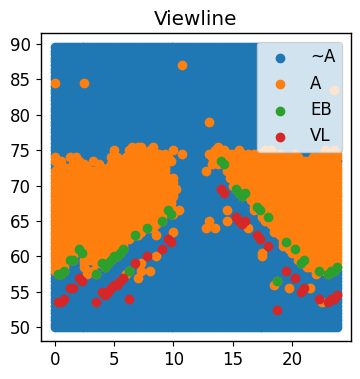

In [63]:
# Data for A from eflux file on GitHub
print("Data for A:")
#print(data) # Added E.M.
#print(labels) # Added E.M

print(df_eflux[["MLT","ML"]]) # Added E.M.
print(df_eflux[["VT"]]) # Added E.M

print("Data for EB:")
print(df_eflux[["EB"]])

print("Data for VL:")
print(df_eflux[["VL"]])

plt.figure(figsize=(4,4))

#reverse plot order to better see A points
plt.scatter(df_eflux["MLT"][np.logical_not(df_eflux['VT'].astype(bool))], df_eflux["ML"][np.logical_not(df_eflux['VT'].astype(bool))], label='~A')
plt.scatter(df_eflux["MLT"][df_eflux['VT'].astype(bool)], df_eflux["ML"][df_eflux['VT'].astype(bool)], label='A')

#Plot EB
plt.scatter(df_eflux["MLT"][df_eflux['EB'].astype(bool)], df_eflux["ML"][df_eflux['EB'].astype(bool)], label='EB')
#Plot VL
plt.scatter(df_eflux["MLT"][df_eflux["VL"].astype(bool)], df_eflux["ML"][df_eflux["VL"].astype(bool)], label='VL')

plt.title("Viewline")
plt.legend()
plt.show()